In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv("zomato1.csv")

# Basic structure
print(df.shape)
print(df.columns)

# General info
print(df.info())


print("Description\n",df.describe())
# Summary of categorical columns
print(df.describe(include='object'))

# Missing values
print("Missing values\n",df.isnull().sum())

# Unique values
print("Unique values\n",df.nunique())


(51717, 17)
Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location              

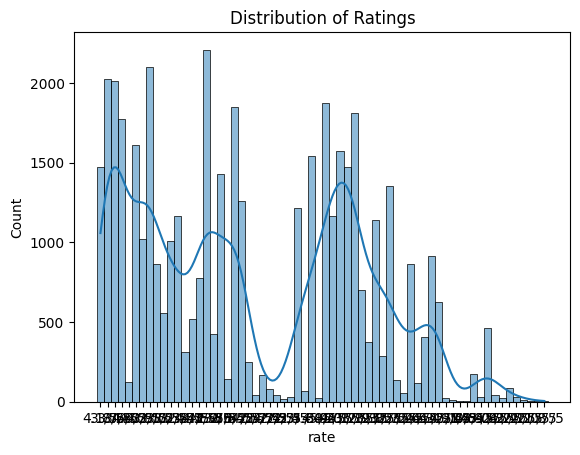

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Rating distribution
sns.histplot(df['rate'], bins=20, kde=True)
plt.title("Distribution of Ratings")
plt.show()


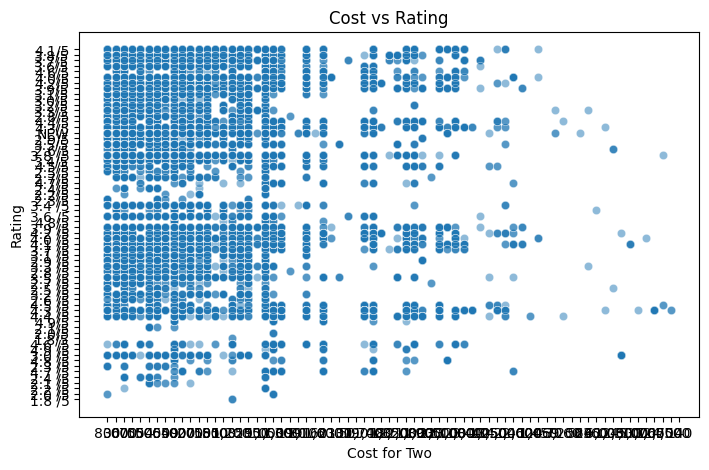

In [6]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='approx_cost(for two people)', y='rate', data=df, alpha=0.5)
plt.title("Cost vs Rating")
plt.xlabel("Cost for Two")
plt.ylabel("Rating")
plt.show()


C:\Users\Anu\AppData\Local\Temp\ipykernel_12660\349579601.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='location', y='rate', data=location_df, ci=None)


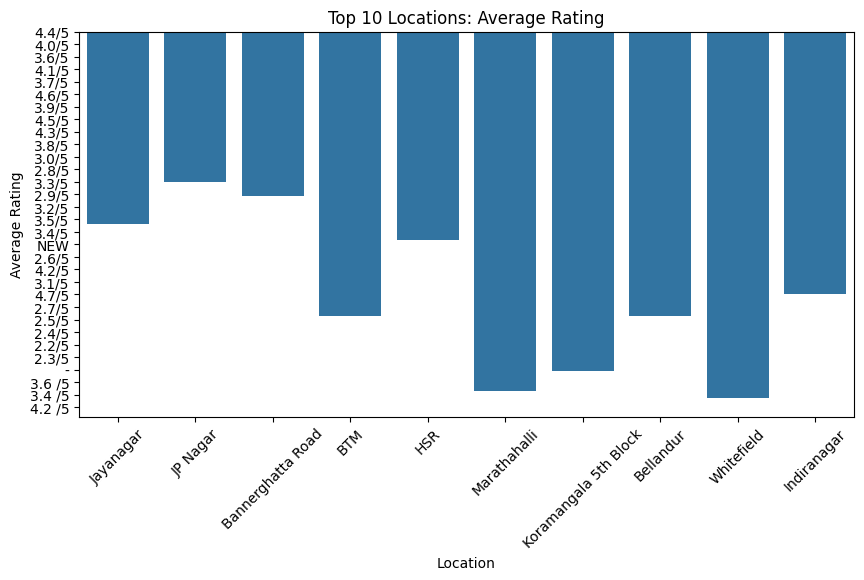

In [7]:
top_locations = df['location'].value_counts().nlargest(10).index
location_df = df[df['location'].isin(top_locations)]

plt.figure(figsize=(10,5))
sns.barplot(x='location', y='rate', data=location_df, ci=None)
plt.xticks(rotation=45)
plt.title("Top 10 Locations: Average Rating")
plt.xlabel("Location")
plt.ylabel("Average Rating")
plt.show()


C:\Users\Anu\AppData\Local\Temp\ipykernel_12660\837521852.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='cuisines', y='rate', data=cuisine_df, ci=None)


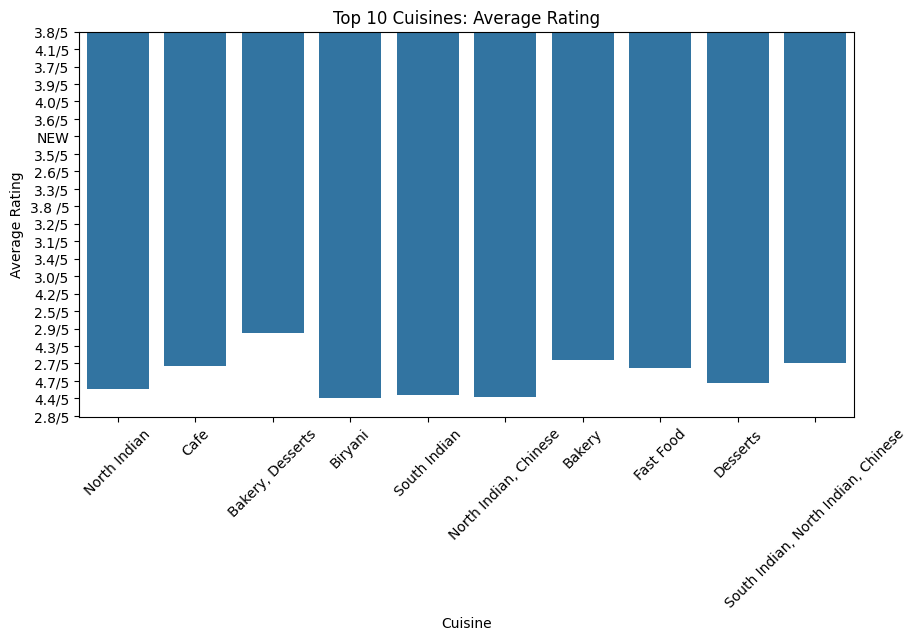

In [8]:
top_cuisines = df['cuisines'].value_counts().nlargest(10).index
cuisine_df = df[df['cuisines'].isin(top_cuisines)]

plt.figure(figsize=(10,5))
sns.barplot(x='cuisines', y='rate', data=cuisine_df, ci=None)
plt.xticks(rotation=45)
plt.title("Top 10 Cuisines: Average Rating")
plt.xlabel("Cuisine")
plt.ylabel("Average Rating")
plt.show()


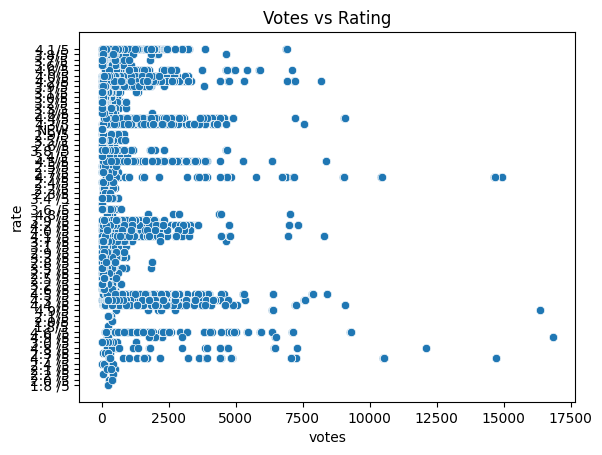

In [3]:
sns.scatterplot(x="votes", y="rate", data=df)
plt.title("Votes vs Rating")
plt.show()


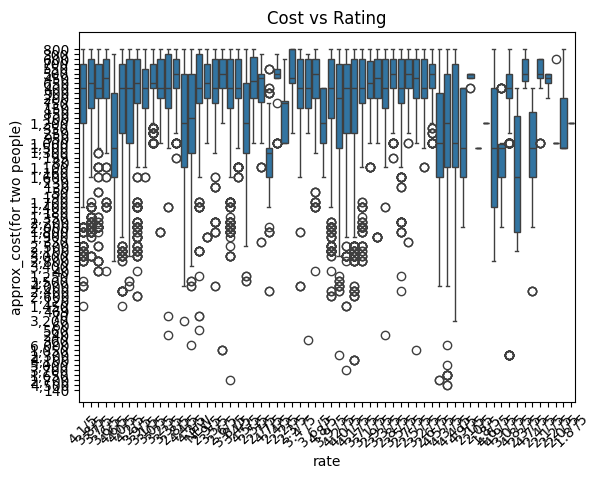

In [4]:
 #Average Cost vs Rating
sns.boxplot(x="rate", y="approx_cost(for two people)", data=df)
plt.title("Cost vs Rating")
plt.xticks(rotation=45)
plt.show()

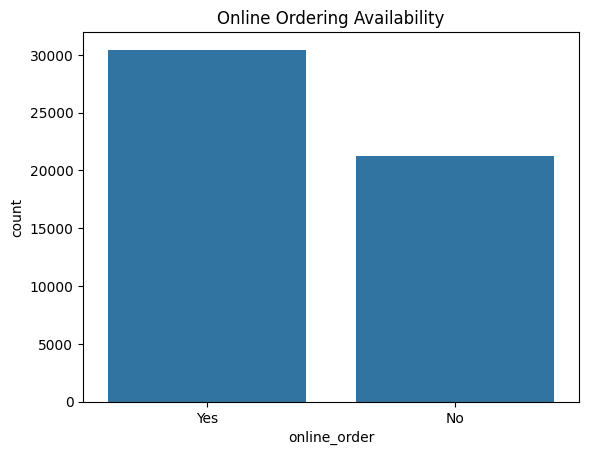

In [5]:
# Count of Online Order Availability
sns.countplot(x="online_order", data=df)
plt.title("Online Ordering Availability")
plt.show()


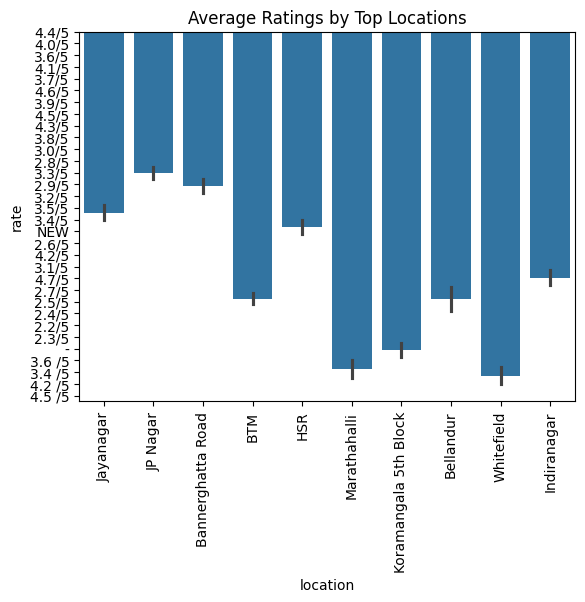

In [6]:
 #Ratings by Location (top 10 locations)
top_loc = df['location'].value_counts().head(10).index
sns.barplot(x="location", y="rate", data=df[df['location'].isin(top_loc)])
plt.xticks(rotation=90)
plt.title("Average Ratings by Top Locations")
plt.show()

In [7]:
df = df.drop_duplicates()

In [8]:
if 'rate' in df.columns:
    df['rate'] = (df['rate'].astype(str)
                             .str.replace("/5", "", regex=False)
                             .str.strip())
    df = df[df['rate'].str.replace(".", "", 1).str.isnumeric()]
    df['rate'] = df['rate'].astype(float)


In [9]:
if 'votes' in df.columns:
    df['votes'] = pd.to_numeric(df['votes'], errors='coerce').fillna(0)

In [10]:
for col in df.columns:
    if "approx" in col.lower() and "cost" in col.lower():
        df[col] = df[col].astype(str).str.replace(",", "", regex=False)
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df[col] = df[col].fillna(df[col].median())
        cost_col = col

In [11]:
if 'online_order' in df.columns:
    df['online_order'] = df['online_order'].map({'Yes': 1, 'No': 0}).fillna(0)

# Book table
if 'book_table' in df.columns:
    df['book_table'] = df['book_table'].map({'Yes': 1, 'No': 0}).fillna(0)

In [12]:
if 'location' in df.columns:
    df['location'] = df['location'].astype(str).str.strip().str.lower()
    top_locations = df['location'].value_counts().head(20).index
    df['location'] = df['location'].apply(lambda x: x if x in top_locations else 'other')

In [13]:
if 'cuisines' in df.columns:
    df['cuisines'] = df['cuisines'].astype(str).str.lower().str.strip()
    top_cuisines = df['cuisines'].str.split(',').explode().value_counts().head(15).index
    df['cuisines'] = df['cuisines'].apply(
        lambda x: ','.join([c for c in x.split(',') if c in top_cuisines]) if x else 'other'
    )

In [14]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()

if 'location' in df.columns:
    df['location'] = le.fit_transform(df['location'])

if 'cuisines' in df.columns:
    df['cuisines'] = le.fit_transform(df['cuisines'])


scaler = StandardScaler()
num_cols = []

if 'votes' in df.columns:
    num_cols.append('votes')

if cost_col in df.columns:
    num_cols.append(cost_col)

df[num_cols] = scaler.fit_transform(df[num_cols])


print("Dataset Shape:", df.shape)
print("Columns:", df.columns)
print(df.head())

Dataset Shape: (41665, 17)
Columns: Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')
                                                 url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3r

In [15]:
# Drop unnecessary columns
drop_cols = [
    'url', 'address', 'name', 'phone',
    'dish_liked', 'reviews_list', 'menu_item',
    'listed_in(type)', 'listed_in(city)'
]

df_model = df.drop(columns=drop_cols, errors='ignore')

# Final dataset shape & columns
print("Final Dataset Shape:", df_model.shape)
print("Final Columns:", df_model.columns)

# Quick preview
print(df_model.head())


Final Dataset Shape: (41665, 8)
Final Columns: Index(['online_order', 'book_table', 'rate', 'votes', 'location', 'rest_type',
       'cuisines', 'approx_cost(for two people)'],
      dtype='object')
   online_order  book_table  rate     votes  location            rest_type  \
0             1           1   4.1  0.480099         0        Casual Dining   
1             1           0   4.1  0.493708         0        Casual Dining   
2             1           0   3.8  0.642269         0  Cafe, Casual Dining   
3             0           0   3.7 -0.298997         0          Quick Bites   
4             0           0   3.8 -0.210541        17        Casual Dining   

   cuisines  approx_cost(for two people)  
0       354                     0.426218  
1       296                     0.426218  
2       252                     0.426218  
3       448                    -0.653668  
4       344                    -0.005736  


In [16]:
from sklearn.preprocessing import LabelEncoder

# Make a copy to avoid overwriting
df_processed = df_model.copy()

# --- Encode categorical columns ---
le = LabelEncoder()

if 'online_order' in df_processed.columns:
    df_processed['online_order'] = le.fit_transform(df_processed['online_order'])

if 'book_table' in df_processed.columns:
    df_processed['book_table'] = le.fit_transform(df_processed['book_table'])

if 'rest_type' in df_processed.columns:
    df_processed['rest_type'] = le.fit_transform(df_processed['rest_type'])

# --- Final check ---
print("Preprocessed Dataset Shape:", df_processed.shape)
print("Columns:", df_processed.columns)
print(df_processed.head())


Preprocessed Dataset Shape: (41665, 8)
Columns: Index(['online_order', 'book_table', 'rate', 'votes', 'location', 'rest_type',
       'cuisines', 'approx_cost(for two people)'],
      dtype='object')
   online_order  book_table  rate     votes  location  rest_type  cuisines  \
0             1           1   4.1  0.480099         0         24       354   
1             1           0   4.1  0.493708         0         24       296   
2             1           0   3.8  0.642269         0         19       252   
3             0           0   3.7 -0.298997         0         73       448   
4             0           0   3.8 -0.210541        17         24       344   

   approx_cost(for two people)  
0                     0.426218  
1                     0.426218  
2                     0.426218  
3                    -0.653668  
4                    -0.005736  


In [17]:
from sklearn.model_selection import train_test_split

# Features (X) and Target (y)
X = df_processed.drop(columns=['rate'])   
y = df_processed['rate']                  

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training Set Shape:", X_train.shape, y_train.shape)
print("Testing Set Shape:", X_test.shape, y_test.shape)


Training Set Shape: (33332, 7) (33332,)
Testing Set Shape: (8333, 7) (8333,)


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Features (X) and Target (y)
X = df_processed.drop(columns=['rate'])   # all features except rating
y = df_processed['rate']                  # target = rating

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred = lr_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print(" Linear Regression Performance:")
print("Mean Absolute Error (MAE):", round(mae, 3))
print("Root Mean Squared Error (RMSE):", round(rmse, 3))
print("R² Score:", round(r2, 3))


 Linear Regression Performance:
Mean Absolute Error (MAE): 0.285
Root Mean Squared Error (RMSE): 0.367
R² Score: 0.305


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Features (X) and Target (y)
X = df_processed.drop(columns=['rate'])   # predictors
y = df_processed['rate']                  # target

# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=100,     # number of trees
    random_state=42,
    n_jobs=-1             # use all CPU cores
)

# Train the model
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Random Forest Performance:")
print("Mean Absolute Error (MAE):", round(mae, 3))
print("Root Mean Squared Error (RMSE):", round(rmse, 3))
print("R² Score:", round(r2, 3))


Random Forest Performance:
Mean Absolute Error (MAE): 0.051
Root Mean Squared Error (RMSE): 0.118
R² Score: 0.928


In [20]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Features (X) and Target (y)
X = df_processed.drop(columns=['rate'])   # predictors
y = df_processed['rate']                  # target

# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize XGBoost model
xgb_model = XGBRegressor(
    n_estimators=200,      # number of trees
    learning_rate=0.1,     # step size shrinkage
    max_depth=6,           # tree depth
    subsample=0.8,         # row sampling
    colsample_bytree=0.8,  # feature sampling
    random_state=42,
    n_jobs=-1
)

# Train the model
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("XGBoost Performance:")
print("Mean Absolute Error (MAE):", round(mae, 3))
print("Root Mean Squared Error (RMSE):", round(rmse, 3))
print("R² Score:", round(r2, 3))


XGBoost Performance:
Mean Absolute Error (MAE): 0.167
Root Mean Squared Error (RMSE): 0.236
R² Score: 0.712


In [20]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return round(mae, 3), round(rmse, 3), round(r2, 3)

# Predictions from both models
rf_pred = rf_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

# Collect Results
results = {
    "Random Forest": evaluate_model(y_test, rf_pred),
    "XGBoost": evaluate_model(y_test, xgb_pred)
}

# Convert to DataFrame for comparison
comparison_df = pd.DataFrame(results, index=["MAE", "RMSE", "R²"]).T
print("\n Model Comparison:\n")
print(comparison_df)



 Model Comparison:

                 MAE   RMSE     R²
Random Forest  0.051  0.118  0.928
XGBoost        0.167  0.236  0.712


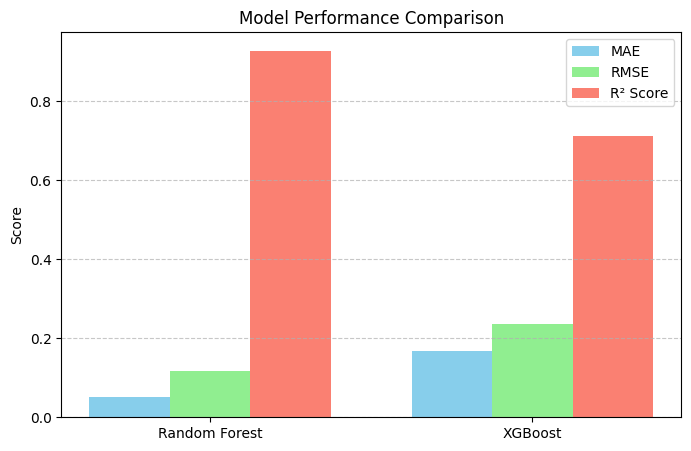

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ["Random Forest", "XGBoost"]

# Metrics from comparison_df (replace with your actual results)
mae = comparison_df["MAE"].values
rmse = comparison_df["RMSE"].values
r2 = comparison_df["R²"].values

x = np.arange(len(models))  # model indices
width = 0.25  # bar width

plt.figure(figsize=(8,5))

# Plot bars for each metric
plt.bar(x - width, mae, width, label="MAE", color="skyblue")
plt.bar(x, rmse, width, label="RMSE", color="lightgreen")
plt.bar(x + width, r2, width, label="R² Score", color="salmon")

# Add labels & formatting
plt.xticks(x, models)
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

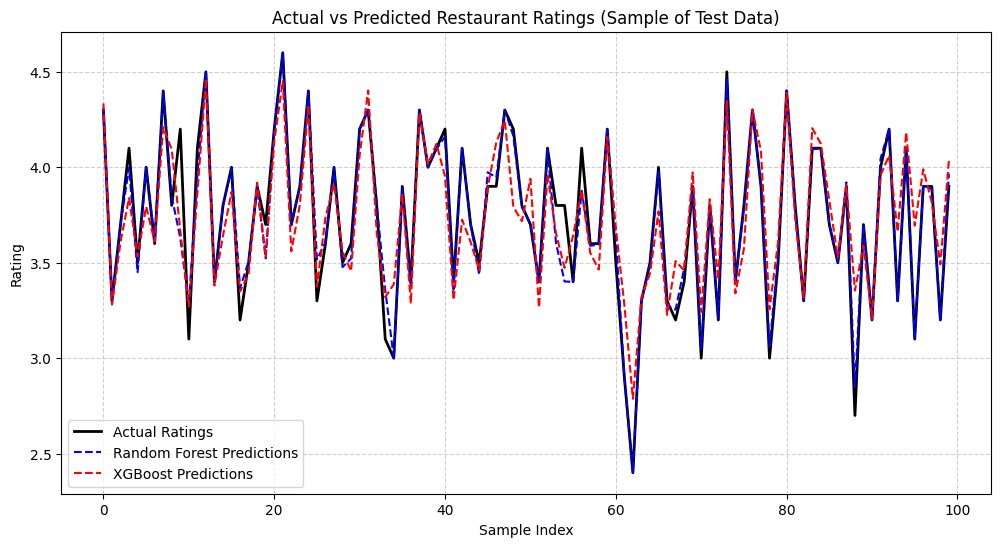

In [23]:
# Take a sample of test data (to avoid too many points)
sample_size = 100
y_test_sample = y_test[:sample_size].reset_index(drop=True)
rf_pred_sample = rf_pred[:sample_size]
xgb_pred_sample = xgb_pred[:sample_size]

# Plot actual vs predicted
plt.figure(figsize=(12,6))

plt.plot(y_test_sample, label="Actual Ratings", color="black", linewidth=2)
plt.plot(rf_pred_sample, label="Random Forest Predictions", color="blue", linestyle="--")
plt.plot(xgb_pred_sample, label="XGBoost Predictions", color="red", linestyle="--")

plt.title("Actual vs Predicted Restaurant Ratings (Sample of Test Data)")
plt.xlabel("Sample Index")
plt.ylabel("Rating")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

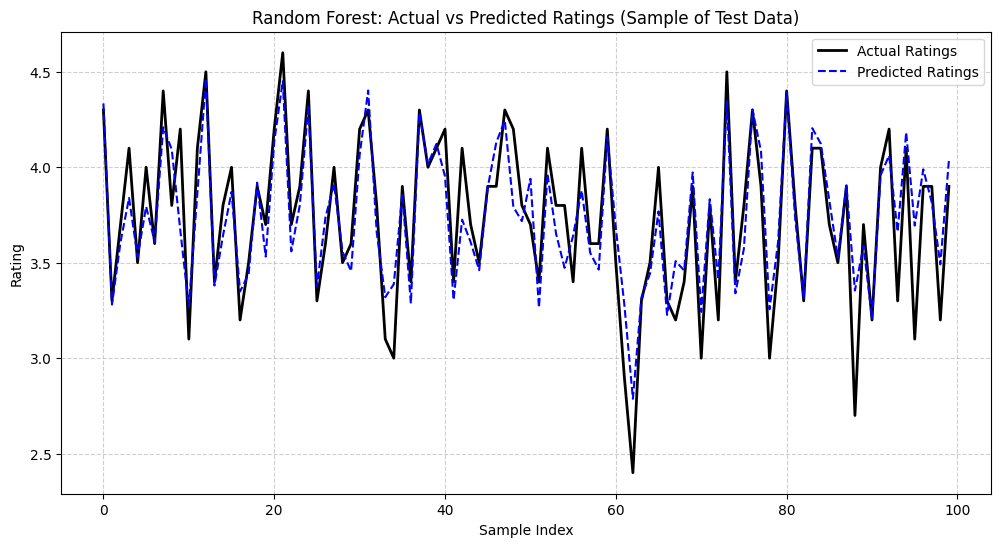

In [24]:
# Take a sample (first 100 rows) for visualization
sample_size = 100
y_test_sample = y_test[:sample_size].reset_index(drop=True)
y_pred_sample = y_pred[:sample_size]

plt.figure(figsize=(12,6))
plt.plot(y_test_sample, label="Actual Ratings", color="black", linewidth=2)
plt.plot(y_pred_sample, label="Predicted Ratings", color="blue", linestyle="--")
plt.xlabel("Sample Index")
plt.ylabel("Rating")
plt.title("Random Forest: Actual vs Predicted Ratings (Sample of Test Data)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

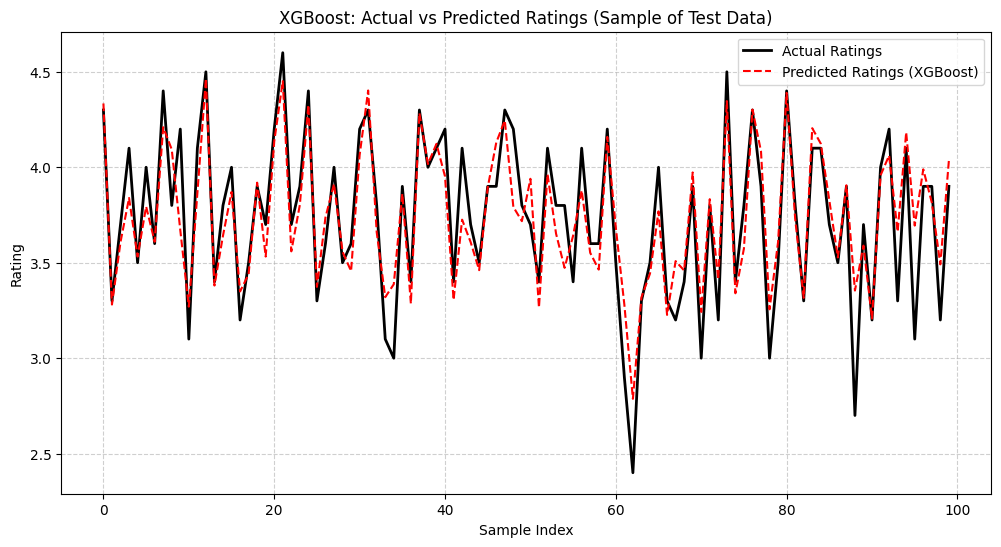

In [25]:
# Take sample of test set for clarity
sample_size = 100
y_test_sample = y_test[:sample_size].reset_index(drop=True)
y_pred_sample = y_pred[:sample_size]

plt.figure(figsize=(12,6))
plt.plot(y_test_sample, label="Actual Ratings", color="black", linewidth=2)
plt.plot(y_pred_sample, label="Predicted Ratings (XGBoost)", color="red", linestyle="--")
plt.xlabel("Sample Index")
plt.ylabel("Rating")
plt.title("XGBoost: Actual vs Predicted Ratings (Sample of Test Data)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

In [26]:
import numpy as np
feature_names = ['online_order', 'book_table', 'votes', 'location', 'rest_type','cuisines', 'approx_cost(for two people)']

user_values = []
for feature in feature_names:
    val = input(f"Enter value for {feature}: ")
    user_values.append(val)

user_input = np.array(user_values).reshape(1, -1)

prediction = rf_model.predict(user_input)
print("Predicted Rate:", prediction[0])

Enter value for online_order:  1
Enter value for book_table:  1
Enter value for votes:  120
Enter value for location:  17
Enter value for rest_type:  25
Enter value for cuisines:  324
Enter value for approx_cost(for two people):  800


Predicted Rate: 4.784999999999994


C:\Users\Anu\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
